### 경로 조건 추가

**보너스 위치를 꼭 지나가야 함**

**goal_hits.log 를 열고 아래와 같은 경로를 복사한 뒤, 웹에 업로드**

**대괄호로만 이루어진 데이터 사용 필수**

[[1,1],[2,1],[3,1],[4,1],[5,1],[6,1],[7,1],[7,2],[7,3],[7,4],[7,5],[7,6],[7,7]]

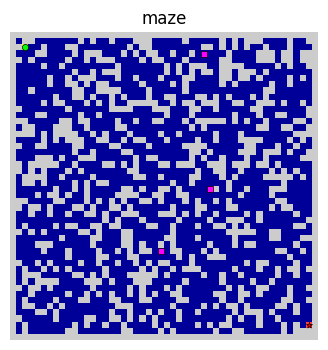

In [6]:
# 환경 설정
SCENARIO = dict(size=50, obstacle_ratio=0.35, view=9, map_seed=2025, fixed_start=(2,2), fixed_goal=(47, 48))

bonus_pos = [(35, 24), (25, 32), (3, 31)]
# print(bonus_pos)

train_env = DummyVecEnv([make_env()])
train_env = VecTransposeImage(train_env)       # HWC -> CHW (이제 이미지로 인식됨)
train_env = VecNormalize(train_env, norm_obs=False, norm_reward=True)

env = train_env.envs[0].unwrapped
obs, _ = env.reset(seed=2025)
img = env.render()
plt.figure(figsize=(4,4)); plt.imshow(img)
sy, sx = env.start; gy, gx = env.goal
plt.scatter([sx],[sy], marker='o', s=20, c='lime', edgecolors='black', linewidths=0.5)
plt.scatter([gx],[gy], marker='*', s=20, c='red',  edgecolors='black', linewidths=0.5)
for pos in bonus_pos:
    plt.scatter(pos[1], pos[0], marker='s', s=20, c='magenta',  edgecolors='black', linewidths=0.5)
plt.axis('off'); plt.title('maze'); plt.show()